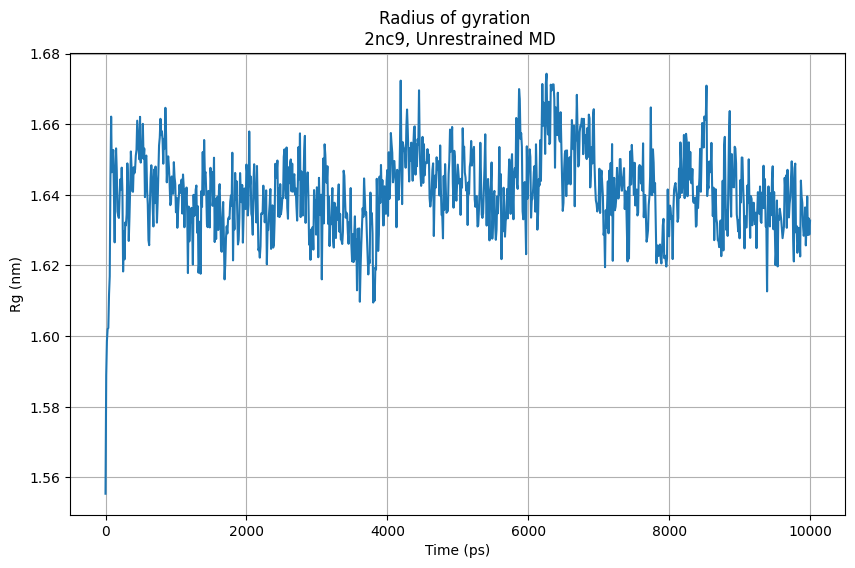

In [1]:
import matplotlib.pyplot as plt

#The library which is needed to create plots - Matplotlib is imported 

#Two empty lists are created to store both 'time' and the 'Radius of gyration' values 

Time = []
Rg = []

#The .xvg file with the results is opened in read mode, and the information it contains 
#(in this case stored in two columns) is seperated and placed in two previously created lists

with open('gyrate.xvg', 'r') as f:
    for line in f:
        if line.startswith(('#', '@')):
            continue
        columns = line.split()
        Time.append(float(columns[0]))
        Rg.append(float(columns[1]))
        
#Size of the plot, x and y axis values, labels and main title are specified and the plot is generated
        
plt.figure(figsize=(10,6))

plt.plot(Time, Rg)
plt.xlabel('Time (ps)')
plt.ylabel('Rg (nm)')
plt.title('Radius of gyration \n 2nc9, Unrestrained MD')
plt.grid(True)
plt.show()

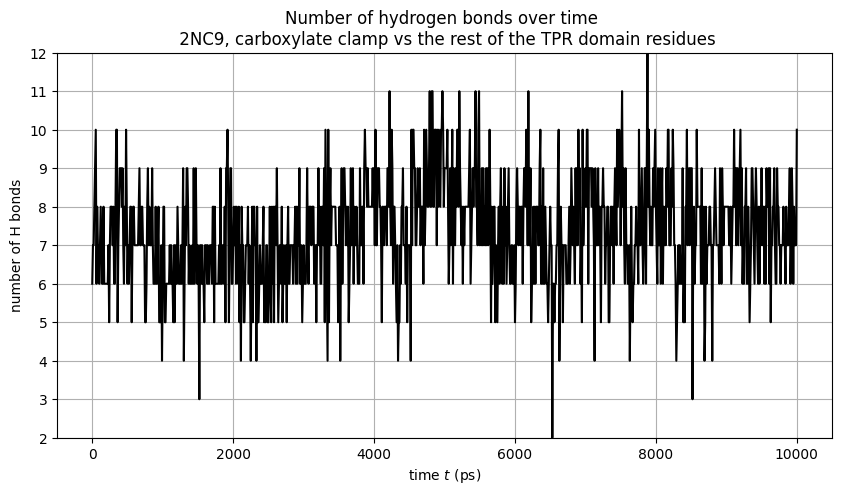

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#For hydrogen bonds data analysis, two different libraries - Numpy and Matplotlib, were used
#The data from the .xvg file is unpacked into two seperate Numpy arrays, first column goes into 'time_hbond' and second into 'hydrogen_bonds'

time_hbond,hydrogen_bonds= np.loadtxt("hbonds_2nc9.xvg", comments=["@", "#"], unpack=True)

#Size, values range from the y axis, x and y axis values, labels and title are specified and the plot is generated 

plt.figure(figsize=(10,5))

plt.ylim(2, 12)
plt.yticks(range(2, 13, 1))
plt.plot(time_hbond,hydrogen_bonds, color="black", linestyle="-")
plt.xlabel("time $t$ (ps)")
plt.ylabel("number of H bonds")
plt.title('Number of hydrogen bonds over time \n 2NC9, carboxylate clamp vs the rest of the TPR domain residues')
plt.grid(True)

plt.show()


In [3]:
median_hydrogen_bonds = np.median(hydrogen_bonds)
print(f'Median of hydrogen bonds: {median_hydrogen_bonds:.2f}')

#The median of hydrogen bonds data is calculated by using the Numpy 'median' function

Median of hydrogen bonds: 7.00


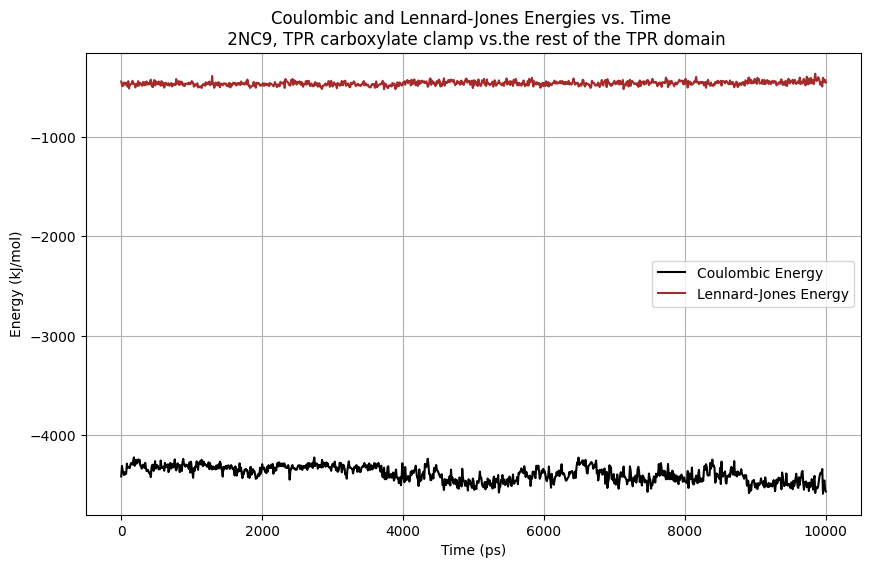

In [4]:
#Three empty lists are created for storing two energy values - Lennard-Jones and Coulombic, but also time frame values of the simulation 

Time_energies = []
Coul_SR = []
LJ_SR = []

#The file containing energy values from the simulation is opened in read mode, and data from the three columns it contain is split in between
#the three lists previously created 

with open('interaction_energy_2nc9.xvg', 'r') as f:
    for line in f:
        if line.startswith(('@', '#')):
            continue
        columns = line.split()
        Time_energies.append(float(columns[0]))
        Coul_SR.append(float(columns[1]))
        LJ_SR.append(float(columns[2]))
 
#The size of the plot, the x and y values (in this case for two different plots in one, as we have two different energies
# shown on the same figure), labels, title and legend are specified and the plot is generated
        
plt.figure(figsize=(10,6))
plt.plot(Time_energies, Coul_SR, label = 'Coulombic Energy', color = 'black')
plt.plot(Time_energies, LJ_SR, label = 'Lennard-Jones Energy', color = 'brown')
plt.xlabel('Time (ps)')
plt.ylabel('Energy (kJ/mol)')
plt.title('Coulombic and Lennard-Jones Energies vs. Time \n 2NC9, TPR carboxylate clamp vs.the rest of the TPR domain')
plt.legend()
plt.grid(True)
plt.show()     

In [5]:
#Medians are calculated by using the Numpy function - median

median_Coul_SR = np.median(Coul_SR)
median_LJ_SR = np.median(LJ_SR)

print(f'Median of Coul-SR energy: {median_Coul_SR:.2f} kJ/mol')
print(f'Median of  LJ-SR energy: {median_LJ_SR:.2f} kJ/mol')

Median of Coul-SR energy: -4380.88 kJ/mol
Median of  LJ-SR energy: -463.65 kJ/mol
